# Imports / Python

Zur Berechnung nutzen wir symoblische Berechnungen in Python, dazu importieren wir sympy. Alternativ kann man dies auch in Matlab, Maple oder Matlab tun.

Für alle Probleme seien immer die Stützpunkte $x_0\ldots x_n$ und die Stützwerte $y_0\ldots y_n$ gegeben. Wir suchen das eindeutige $p\in{\cal P}_n$ mit $p(x_j)=y_j$, $j=0\ldots n$.

Für die Beispiele nutzen wir $n=5$, $x_k=k$, $y_k=\sqrt{x_k}$ oder das Beispiel der Vorlesung. In den Python-Codes nutzen wir $t_k$ für die Stützstellen, um nicht mit dem $x$ durcheinanderzukommen.

In [1]:
!pip install --user sympy numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
from IPython.display import display
sympy.init_printing(use_latex='mathjax')

In [2]:
x=sympy.symbols("x")
n=5
#t=[sympy.Integer(k) for k in range(0,n+1)]
#y=[sympy.sqrt(t[k]) for k in range(0,n+1)]
f=math.sqrt
t=[k for k in range(0,n+1)]
y=[f(t[k]) for k in range(0,n+1)]
# Werte der Vorlesung
n=2
tN=[-1,0,2]
y=[1,2,3]
t=[sympy.Integer(tN[k]) for k in range(0,n+1)]

# Lagrange

Wir definieren nach Vorlesung die Polynome
$$\tilde w_j(x):=\prod_{k=0\ldots n, k\not=j}(x-x_k)$$
und damit
$$w_j(x):=\frac{\tilde w_j(x)}{\tilde w_j(x_j)}.$$

Diese Polynome erfüllen die Interpolationsaufgabe
$$w_j(x_k)=\delta_{j,k}$$
mit dem Kronecker--Delta $\delta$. Laut Vorlesung ist damit
$$p(x)=\sum_{j=0}^n y_j w_j(x)$$
Lösung der Interpolationsaufgabe.

In [3]:
def Lagrange(t,y):
    n=len(t)
    p=0
    for j in range(0,n):
        w=1
        for k in range(0,n):
            if (j != k):
                w=w*(x-t[k])
        p=p+y[j]*w/w.subs(x,t[j])
    return p
def testen(p,t,y):
    n=len(t)
    for k in range(0,n):
        print(t[k],y[k],p.subs(x,t[k]),y[k]-p.subs(x,t[k]))

Lagrangepolynom:


x⋅(x - 2)   x⋅(x + 1)                  
───────── + ───────── - (x - 2)⋅(x + 1)
    3           2                      


Zusammengefasst:


   2          
  x    5⋅x    
- ── + ─── + 2
  6     6     


Stützpunkt, Stützwert, Polynomwert, Unterschied
-1 1 1 0
0 2 2 0
2 3 3 0


Text(0.5, 1.0, 'Plot des Interpolationspolynoms')

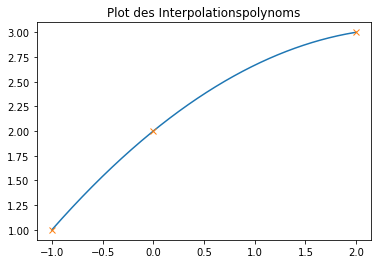

In [4]:
p=Lagrange(t,y)
print('Lagrangepolynom:')
display(p)
p=sympy.expand(p)
print()
print('Zusammengefasst:')
display(p)
print()
print('Stützpunkt, Stützwert, Polynomwert, Unterschied')
testen(p,t,y)
X=np.linspace(tN[0],tN[n],1000)
Y=[p.subs(x,z) for z in X]
plt.plot(X,Y)
plt.plot(t,y,'x')
plt.title('Plot des Interpolationspolynoms')
#Ytrue=[f(z) for z in X]
#plt.plot(X,Y,X,Ytrue)
#plt.legend(['Polynom','Funktion'])
#T=plt.title('Vergleich: Wurzelfunktion und Interpolationspolynom')

# Vandermondematrix

Wir können laut Vorlesung auch einfach das Problem mit einer Vandermondematrix lösen.

In [5]:
def vandermonde(t):
    n=len(t)-1
    A=np.zeros([n+1,n+1],type(t[0]))
    for i in range(0,n+1):
        for k in range(0,n+1):
            A[i,k]=t[i]**(n-k)
    return A

def poly_coeff(t,y):
    A=vandermonde(t)
    coeff=np.linalg.solve(A,y)
    return coeff

A=vandermonde(tN)
print(A)
print()
coeff=poly_coeff(tN,y)
print(coeff)


[[ 1 -1  1]
 [ 0  0  1]
 [ 4  2  1]]

[-0.16666667  0.83333333  2.        ]


# Formel von Neville

Nach Vorlesung gilt mit der Definition
$$p_{i}(x)=y_i,\,p_{i\ldots k+1}(x)=\frac 1 {x_i-x_{k+1}}((x-x_{k+1})p_{i\ldots k}(x)+(x_i-x) p_{i+1\ldots k+1}(x))$$
$$p=p_{0\ldots n}(x).$$
Wir speichern die einzelnen Polynome in eine Matrix $A$, so dass $A_{i,j}=p_{i\ldots j}(x).$

In [6]:
def neville(t,y):
    n=len(t)-1
    A=sympy.zeros(n+1,n+1)
    for j in range(0,n+1):
        for i in range(0,n+1-j):
            if (j==0):
                A[i,i]=y[i]
            else:
                k=i+j
                A[i,k]=1/(t[i]-t[k])*((x-t[k])*A[i,k-1]+(t[i]-x)*A[i+1,k])
    return A

A=neville(t,y)
display(A)
p=A[0,n]
display(p.expand())

⎡                     ⎛x    ⎞                  ⎤
⎢            (-x - 1)⋅⎜─ + 2⎟                  ⎥
⎢                     ⎝2    ⎠   (x - 2)⋅(x + 2)⎥
⎢1  x + 2  - ──────────────── - ───────────────⎥
⎢                   3                  3       ⎥
⎢                                              ⎥
⎢                         x                    ⎥
⎢0    2                   ─ + 2                ⎥
⎢                         2                    ⎥
⎢                                              ⎥
⎣0    0                     3                  ⎦

   2          
  x    5⋅x    
- ── + ─── + 2
  6     6     

# Formel von Neville: Polynomauswertung

Bei der Auswertung mit Hilfe der Formel von Neville berechnen wir nicht das Polynom, sondern werten es nur an einer gegebenen Stelle $z$ aus. Das Programm ist exakt das gleiche, nur rechnen wir diesmal mit Zahlen.

In [7]:
def neville_auswertung(t,y,z):
    n=len(t)-1
    A=np.zeros([n+1,n+1])
    for j in range(0,n+1):
        for i in range(0,n+1-j):
            if (j==0):
                A[i,i]=y[i]
            else:
                k=i+j
                A[i,k]=1/(t[i]-t[k])*((z-t[k])*A[i,k-1]+(t[i]-z)*A[i+1,k])
    return A

z=2.5
print('Neville-Tableau:')
A=neville_auswertung(t,y,z)
print(A)
print()
print('Auswertung des Polynoms an der Stelle z:')
print(A[0,n])
print('Auswertung durch Einsetzen:')
print(p.subs(x,z))

Neville-Tableau:
[[1.         4.5        3.04166667]
 [0.         2.         3.25      ]
 [0.         0.         3.        ]]

Auswertung des Polynoms an der Stelle z:
3.0416666666666665
Auswertung durch Einsetzen:
3.04166666666667


# Dividierte Differenzen

Wir benutzen direkt die rekursive Formel:

$$[y_i]=y_i,\,[y_i\ldots y_k]=\frac {1} {x_i-x_k} ([y_i\ldots y_{k-1}]-[y_{i+1}\ldots y_k])$$

und setzen dann ein

$$p=\sum_{j=0}^n [y_0\ldots y_j] (x-x_0)\cdots(x-x_{j-1}).$$


In [8]:
def divdiff(t,y):
    n=len(t)-1
    A=np.zeros([n+1,n+1])
    for j in range(0,n+1):
        for i in range(0,n+1-j):
            if (j==0):
                A[i,i]=y[i]
            else:
                k=i+j
                A[i,k]=1/(t[i]-t[k])*(A[i,k-1]-A[i+1,k])
    return A

def newtonpolynom(A,t):
    n=len(t)-1
    q=0
    w=1
    for i in range(0,n+1):
        q=q+w*A[0,i]
        w=w*(x-t[i])
    return q

A=divdiff(t,y)
print('Dividierte Differenzen:')
print(A)
print()
q=newtonpolynom(A,t)
print('Newtonpolynom:')
print(q.expand())

Dividierte Differenzen:
[[ 1.          1.         -0.16666667]
 [ 0.          2.          0.5       ]
 [ 0.          0.          3.        ]]

Newtonpolynom:
-0.166666666666667*x**2 + 0.833333333333333*x + 2.0
